In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.plotly as py
import plotly.tools as tls
from plotly.offline import *
from plotly.graph_objs import *
import plotly.express as px

In [2]:
def format_plot(ymin,ymax,tx,ty,ylab,info):
        
    plt.figure(figsize=(12,9))
    ax = plt.subplot(111)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.ylabel(ylab, fontsize= 17)
    plt.ylim(ymin,ymax)
    #plt.xlim('3-00','6-26')
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.gca().invert_xaxis()
    plt.tick_params(axis='both', which='both',bottom='off')
    ax.xaxis.set_major_locator(plt.MaxNLocator(15))
    plt.text(tx,ty,info+
            '\nAuthor: Nathan Stein (ntstein.com/home)', fontsize=10)

In [3]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 

In [4]:
#population info from https://www.census.gov/data/tables/time-series/demo/popest/2010s-state-total.html#par_textimage_1574439295
dat = pd.read_csv('C:/Users/ntste/Documents/Personal/Kaggle/Covid/daily_6_25.csv')
dat['date'] = pd.to_datetime(dat['date'], format = '%Y%m%d') #format date
dat['date'] = dat['date'].astype(str)
dat['date'] = dat['date'].map(lambda x: x.lstrip('2020-'))
dat.head()
state_pops = pd.read_csv('C:/Users/ntste/Documents/Personal/Kaggle/Covid/2019_state_pops.csv')

In [5]:
#Extract state abbreviations
states = dat['state'].unique().tolist()
states = [i for i in states if i not in ['GU','VI','MP','PR','DC','AS']]
states = [i for i in states if str(i) != 'nan']

#assign states to region
regions = []
for state in states:
    if state in ['ME','MA','RI','CT','NH','VT','NY','PA','NJ', 'DE', 'MD']:
        regions.append('Northeast')
    elif state in ['WV','VA','KY','TN','NC','SC','GA','AL','MS','AR','LA','FL']:
        regions.append('Southeast')
    elif state in ['OH','IN','MI','IL','MO','WI','MN','IO','KS','NE','SD','ND']:
        regions.append('Midwest')
    elif state in ['TX','OK','NM','AZ']:
        regions.append('Southwest')
    else:
        regions.append('West')
        
ca = dat.loc[dat['state'] == 'CA']
ca_inf = ca[['date','totalTestResultsIncrease','totalTestResults']]
test_change_num = ca_inf['totalTestResultsIncrease'].diff(periods=1) #daily change in number of tests
#ca_inf['testChangeNum'] = test_change
#test_change_pct_wk = ca_inf['testChangeNum'].pct_change(periods = 7)
#ca_inf['testChangePctWk'] = test_change_pct_wk
#print(ca['totalTestResultsIncrease'].rolling(window=7).mean())
#print(ca_inf)
#plt.plot(ca['date'], ca_inf['totalTestResults'])
#print(ca_inf['testChange'])


C:\Users\ntste\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



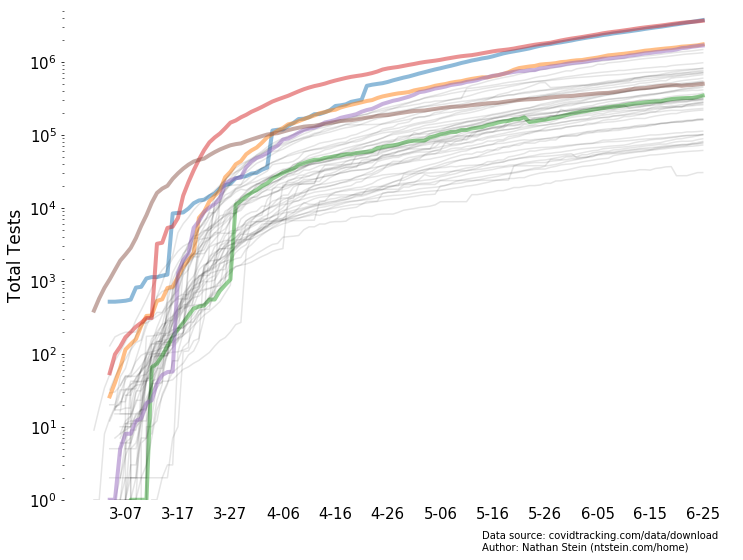

In [6]:
count = 0
format_plot(1,5*10**6,'5-14',.2,'Total Tests','Data source: covidtracking.com/data/download')
for i in range(len(states)):
    inf = dat.loc[dat['state'] == states[i]]
    if states[i] in ['CA','FL','NY','MO','WA','TX']:
        pplt = plt.semilogy(inf['date'], inf['totalTestResults'],color=tableau20[count*2], alpha=0.5, linewidth = 4)
        count += 1
    else:
        pplt = plt.semilogy(inf['date'], inf['totalTestResults'],'k-', alpha=0.1)
#iplot_mpl(pplt,image_filename='test')

C:\Users\ntste\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



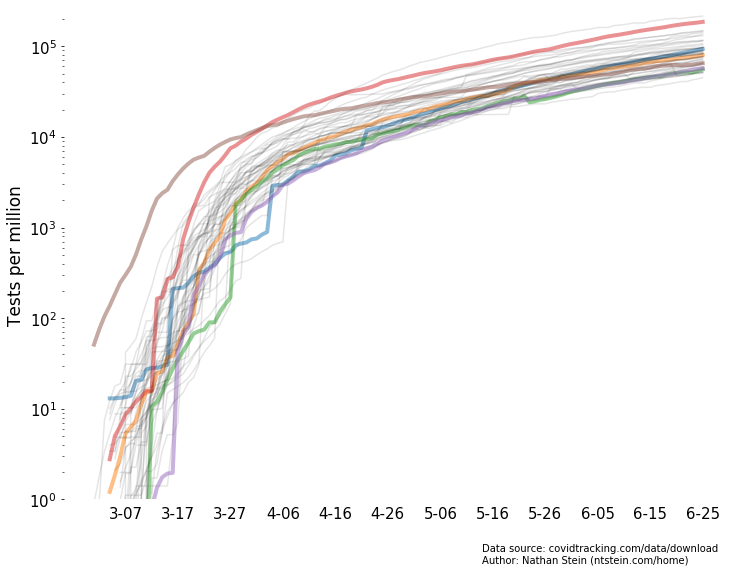

In [20]:
#Investigate total tests as function of time normalized by state population

count = 0 
format_plot(1,.25*10**6,'5-14',.2,'Tests per million','Data source: covidtracking.com/data/download')
for i in range(len(states)):
    inf = dat.loc[dat['state'] == states[i]]
    state_pop = state_pops.loc[state_pops['state']==states[i]]['population'].iloc[0]
    if states[i] in ['CA','FL','NY','MO','WA','TX']:
        pplt = plt.semilogy(inf['date'], 10**6*inf['totalTestResults']/state_pop,color=tableau20[count*2], alpha=0.5, linewidth = 4)
        count += 1
    else:
        pplt = plt.semilogy(inf['date'], 10**6*inf['totalTestResults']/state_pop,'k-', alpha=0.1)
#iplot_mpl(pplt,image_filename='test')

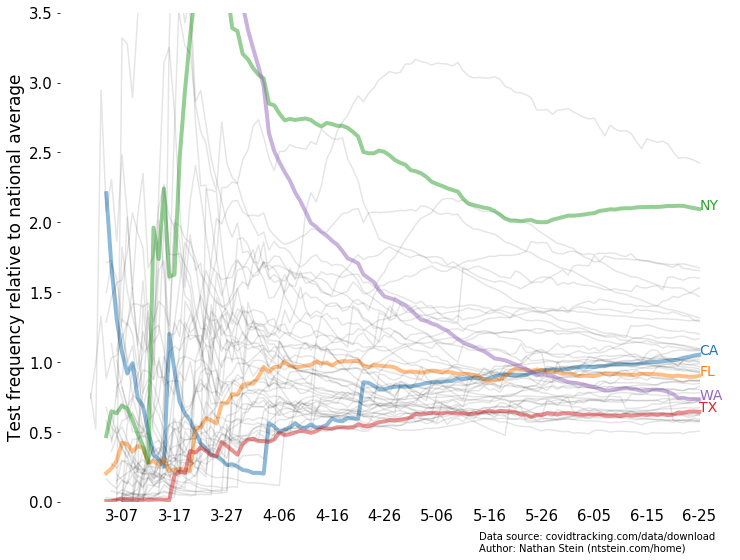

In [8]:
#Investigate total tests per state as fraction of mean population-normalized total
#i.e. total tests per million/US state average tests per million
count = 0

#Calculate the population-normalized total tests country-wide for each date
dates = dat['date'].unique().tolist()
dates.remove('NaT')
daily_test_total = []
for day in dates:
    day_tot = 0
    inf_day = dat.loc[dat['date'] == day]
    for st in states:
        inf = inf_day.loc[inf_day['state'] == st]
        if not inf.empty:
            day_tot += inf['totalTestResults'].iloc[0]
    daily_test_total.append(day_tot) #total number of tests up to that day for each date

#Calculate US proportion of tests norm. by pop to date by date and perform inner join w/ main table
daily_test_total_norm = pd.DataFrame(daily_test_total/state_pops['population'].sum(), columns=['us test proportion to date'])
daily_test_total_norm['date'] = dates
merged = pd.merge(dat,daily_test_total_norm,how='inner')

#Plot ratio of total tests/mil over country-wide average tests/mil
format_plot(0,3.5,'5-14',-.35,'Test frequency relative to national average','Data source: covidtracking.com/data/download')

final_date_performance = [] # list of the most recent ratio of cumulative tests per state (norm pop) rel country total (norm pop)
final_date_cases_norm  = [] # list of cumulative positive cases by state normalized by population as of last date
for i in range(len(states)):
    inf = merged.loc[dat['state'] == states[i]]
    state_pop = state_pops.loc[state_pops['state']==states[i]]['population'].iloc[0]
    if states[i] in ['CA','FL','NY','WA','TX']:
        pplt = plt.plot(inf['date'], inf['totalTestResults']/state_pop/inf['us test proportion to date'],color=tableau20[count*2], alpha=0.5, linewidth = 4)
        y_pos = inf['totalTestResults']/state_pop/inf['us test proportion to date'].iloc[0]
        cases = inf['positive']/state_pop
        plt.text('6-25', y_pos.iloc[0], states[i], color = tableau20[count*2],fontsize=14)
        count += 1
    else:
        pplt = plt.plot(inf['date'], inf['totalTestResults']/state_pop/inf['us test proportion to date'],'k-', alpha=0.1)
        y_pos = inf['totalTestResults']/state_pop/inf['us test proportion to date'].iloc[0]
        cases = inf['positive']/state_pop
    final_date_performance.append(y_pos.iloc[0])
    final_date_cases_norm.append(100*cases.iloc[0])
    #add text label to the right of every line
    #y_pos = inf['totalTestResults']/state_pop/inf['us test proportion to date'].values[-1]
    #plt.text('6-30', y_pos, )
    
#iplot_mpl(pplt,image_filename='test')

In [9]:
# Plot testing comparison by state
test_comp = pd.DataFrame(states,columns=['state'])
test_comp['Normalized test performance rel. natl. avg.'] = final_date_performance
fig = px.choropleth(test_comp,  # Input Pandas DataFrame
                    locations="state",  # DataFrame column with locations
                    color="Normalized test performance rel. natl. avg.",  # DataFrame column with color values
                    hover_name="state", # DataFrame column hover info
                    locationmode = 'USA-states',# Set to plot as US States
                    color_continuous_scale=px.colors.diverging.RdYlBu,
                    range_color=(0.5,1.6))
fig.update_layout(
    title_text = 'Population-normalized test frequency relative to national average through 6/25<br>(hover for details)', # Create a Title
    geo_scope='usa',  # Plot only the USA instead of globe
)
fig.show()  # Output the plot to the screen

In [15]:
#Compare state testing performance to prevalence of positive tests
test_comp['Positive tests as % of population'] = final_date_cases_norm
test_comp['Region'] = regions

#extract number of positive cases by date
inf = dat[dat['date']=='6-25']
positive   = [] #positive cases as of x date by state
population = [] #state population
parties    = [] #gubernatorial parties
for state in states:
    pos_val = inf[inf['state']==state]['positive']
    state_pop = state_pops.loc[state_pops['state']==state]['population'].iloc[0]
    party = state_pops.loc[state_pops['state']==state]['party'].iloc[0]
    positive.append(pos_val.iloc[0])
    population.append(state_pop)
    parties.append(party)
test_comp['Positive Cases']   = positive
test_comp['Population'] = population
test_comp['Gubernatorial Party'] = parties

#Plot
fig = px.scatter(test_comp,x='Positive tests as % of population',
                 y='Normalized test performance rel. natl. avg.',
                 size=test_comp['Positive Cases'],   #scale size by total positive cases to date
                 color = 'Region',  #color by region
                 hover_data=['state','Positive Cases'])
fig.show()

#Calculate correlations
print('Correlation between normalized test number and normalized positive case frequency:', test_comp['Positive tests as % of population'].corr(test_comp['Normalized test performance rel. natl. avg.']))
print('Correlation between normalized test number and total positive cases:', test_comp['Positive tests as % of population'].corr(test_comp['Positive Cases']))
print('Correlation between normalized test number and state population:', test_comp['Positive tests as % of population'].corr(test_comp['Population']))


Correlation between normalized test number and normalized positive case frequency: 0.6621643681419545
Correlation between normalized test number and total positive cases: 0.6201579663520949
Correlation between normalized test number and state population: 0.16025544286237337


In [18]:
#Investigate any correlations with state gubernatorial party 
fig = px.scatter(test_comp,x='Positive tests as % of population',
                 y='Normalized test performance rel. natl. avg.',
                 size=test_comp['Positive Cases'],
                 color = 'Gubernatorial Party',  #color by region
                 color_discrete_map = {'Republican':'Red','Democrat':'Blue'},
                 hover_data=['state','Positive Cases'])
fig.show()

In [24]:
# As of late June, positive case numbers are increasing in many states
# including the three most populous states: Florida, Texas, and California.
# We saw that the number of daily tests continues to increase in every state. So does testing alone explain
# the growing number of positive cases? 
# First let's look at the percent of tests that come back positive in each state. Ideally this number should decrease
# as the number of tests increases. 

#Calculate % positive rate
dat['positiveRate'] = 100*dat['positiveIncrease']/dat['totalTestResultsIncrease']

#Plot

count = 0 
format_plot(0,50,'5-14',-2,'Percent positive rate','Data source: covidtracking.com/data/download')
for i in range(len(states)):
    inf = dat.loc[dat['state'] == states[i]]
    state_pop = state_pops.loc[state_pops['state']==states[i]]['population'].iloc[0]
    if states[i] in ['CA','FL','NY','MO','WA','TX']:
        pplt = plt.plot(inf['date'], inf['positiveRate'].rolling_mean(7),color=tableau20[count*2], alpha=0.5, linewidth = 4)
        count += 1
    else:
        pplt = plt.plot(inf['date'], inf['positiveRate'].rolling_mean(7),'k-', alpha=0.1)
#iplot_mpl(pplt,image_filename='test')

AttributeError: 'Series' object has no attribute 'rolling_mean'

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x0000015874F38950> (for post_execute):


AttributeError: 'NoneType' object has no attribute 'update'

AttributeError: 'NoneType' object has no attribute 'update'

<Figure size 864x648 with 1 Axes>